In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,NaN,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,NaN
2,13.16,2.36,NaN,18.6,101.0,2.80,3.24,0.30,NaN,5.68,NaN,3.17,1185.0
3,NaN,1.95,NaN,16.8,113.0,3.85,NaN,0.24,2.18,7.80,NaN,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,NaN,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,NaN,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,NaN,NaN,NaN,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8
float64		column 2	29
float64		column 3	29
float64		column 4	7
float64		column 5	21
float64		column 6	14
float64		column 7	15
float64		column 8	21
float64		column 9	8
float64		column 10	14
float64		column 11	15
float64		column 12	14
float64		column 13	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,170.000000,149.000000,149.000000,171.000000,157.000000,164.000000,163.000000,157.000000,170.000000,164.000000,163.000000,164.000000,157.000000
mean,13.002353,2.290805,2.369866,19.511696,100.535032,2.300305,2.042209,0.362930,1.572176,5.039695,0.955558,2.591037,743.331210
std,0.798978,1.048447,0.250729,3.297197,14.035910,0.614822,1.009968,0.119014,0.559533,2.288002,0.219986,0.703859,313.480306
min,11.030000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.140000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.610000,2.240000,17.200000,90.000000,1.797500,1.150000,0.270000,1.250000,3.250000,0.790000,1.897500,502.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.355000,2.170000,0.340000,1.545000,4.690000,0.960000,2.780000,675.000000
75%,13.662500,2.890000,2.530000,21.500000,108.000000,2.800000,2.895000,0.430000,1.942500,6.107500,1.120000,3.162500,970.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.630000,3.580000,13.000000,1.450000,3.920000,1680.000000


<AxesSubplot:>

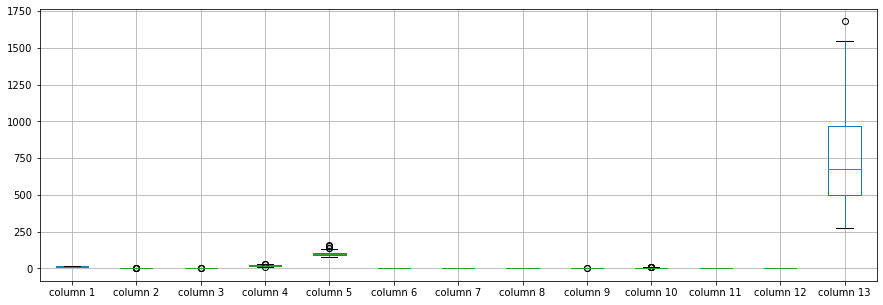

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.002353
column 2       2.290805
column 3       2.369866
column 4      19.511696
column 5     100.535032
column 6       2.300305
column 7       2.042209
column 8       0.362930
column 9       1.572176
column 10      5.039695
column 11      0.955558
column 12      2.591037
column 13    743.331210
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.082002,0.276836,-0.289736,0.332389,0.284451,0.228965,-0.187552,0.127748,0.536407,-0.015213,0.081006,0.634271
column 2,0.082002,1.000000,0.133238,0.241217,-0.109539,-0.275658,-0.395064,0.285970,-0.178939,0.214585,-0.553964,-0.356877,-0.237160
column 3,0.276836,0.133238,1.000000,0.400678,0.288226,0.121565,0.131101,0.154369,-0.012919,0.311862,0.007986,0.016547,0.223439
column 4,-0.289736,0.241217,0.400678,1.000000,-0.069114,-0.304603,-0.343278,0.307898,-0.161441,-0.008917,-0.265088,-0.272149,-0.415802
column 5,0.332389,-0.109539,0.288226,-0.069114,1.000000,0.218073,0.178261,-0.304804,0.214582,0.164162,0.129499,0.115277,0.394809
column 6,0.284451,-0.275658,0.121565,-0.304603,0.218073,1.000000,0.866416,-0.397211,0.629064,0.010619,0.417323,0.707291,0.480784
column 7,0.228965,-0.395064,0.131101,-0.343278,0.178261,0.866416,1.000000,-0.536953,0.662657,-0.158459,0.550629,0.793387,0.462423
column 8,-0.187552,0.285970,0.154369,0.307898,-0.304804,-0.397211,-0.536953,1.000000,-0.329316,0.137914,-0.248430,-0.492314,-0.291498
column 9,0.127748,-0.178939,-0.012919,-0.161441,0.214582,0.629064,0.662657,-0.329316,1.000000,-0.002102,0.290809,0.511581,0.268335
column 10,0.536407,0.214585,0.311862,-0.008917,0.164162,0.010619,-0.158459,0.137914,-0.002102,1.000000,-0.485430,-0.394776,0.290323


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+8,13+8+8,13+8+8,13+8+8+8+8,13+8+8+8+8+8,13+8+8+8+8+8+8,13+8+8+8+8+8,13+8+8+8+8,13+8+8+8,13+8+8,13+8,13], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 846.1848477450284
Epoch: 1 , loss: 849.148848100142
Epoch: 2 , loss: 849.3228260387074
Epoch: 3 , loss: 849.0633544921875
Epoch: 4 , loss: 849.6319469105114
Epoch: 5 , loss: 846.4591619318181
Epoch: 6 , loss: 844.8648626154119
Epoch: 7 , loss: 848.8356822620739
Epoch: 8 , loss: 848.2950439453125
Epoch: 9 , loss: 836.8855119185014
Epoch: 10 , loss: 853.1332064541904
Epoch: 11 , loss: 850.5027798739346
Epoch: 12 , loss: 845.2905051491477
Epoch: 13 , loss: 846.012900612571
Epoch: 14 , loss: 854.0242198597301
Epoch: 15 , loss: 846.9667302911931
Epoch: 16 , loss: 844.0332863547585
Epoch: 17 , loss: 838.8989979137074
Epoch: 18 , loss: 852.7196377840909
Epoch: 19 , loss: 847.2656860351562
Epoch: 20 , loss: 844.1449252041904
Epoch: 21 , loss: 851.4385486949574
Epoch: 22 , loss: 849.6491810191761
Epoch: 23 , loss: 844.6106012517756
Epoch: 24 , loss: 857.5651689009233
Epoch: 25 , loss: 843.5336303710938
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,0.0,0.000000,-2.778397,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,-1049.979511
2,0.000000,0.000000,-2.646960,0.0,0.000000,0.000000,0.000000,0.0,-2.786844,0.000000,-1.006878,0.0,0.000000
3,-14.347209,0.000000,-2.477367,0.0,0.000000,0.000000,-3.467374,0.0,0.000000,0.000000,-0.837339,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,-7.677005,0.000000,0.0,0.000000
174,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
175,0.000000,-4.256719,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
176,0.000000,0.000000,0.000000,0.0,-119.976384,-1.626384,-0.656501,0.0,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3868.381081611757, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3549599360948018

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       0.024776
column 4      15.000000
column 5      78.000000
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.710000,2.430000,15.6,127.000000,0.021603,3.060000,0.28,2.290000,5.640000,1.040000,3.92,1065.000000
1,13.200000,1.780000,2.140000,11.2,100.000000,2.650000,2.760000,0.26,1.280000,4.380000,1.050000,3.40,0.020489
2,13.160000,2.360000,0.023040,18.6,101.000000,2.800000,3.240000,0.30,0.023156,5.680000,0.023122,3.17,1185.000000
3,0.022791,1.950000,0.022633,16.8,113.000000,3.850000,0.022626,0.24,2.180000,7.800000,0.022661,3.45,1480.000000
4,13.240000,2.590000,2.870000,21.0,118.000000,2.800000,2.690000,0.39,1.820000,4.320000,1.040000,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.450000,20.5,95.000000,1.680000,0.610000,0.52,1.060000,0.022995,0.640000,1.74,740.000000
174,13.400000,3.910000,2.480000,23.0,102.000000,1.800000,0.750000,0.43,1.410000,7.300000,0.700000,1.56,750.000000
175,13.270000,0.023281,2.260000,20.0,120.000000,1.590000,0.690000,0.43,1.350000,10.200000,0.590000,1.56,835.000000
176,13.170000,2.590000,2.370000,20.0,0.023616,0.023616,0.023499,0.53,1.460000,9.300000,0.600000,1.62,840.000000


In [20]:
imputations[-1].to_excel("Wine_NW_10(imp).xlsx", index=False, header=False)